In [1]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive
from matplotlib import pyplot as plt

In [2]:
nx = 10
dx = 1. / nx

In [3]:
def A(x):
    # Left part of initial equation
    return x + (1. + 3.*x**2) / (1. + x + x**3)


def B(x):
    # Right part of initial equation
    return x**3 + 2.*x + x**2 * ((1. + 3.*x**2) / (1. + x + x**3))


def f(x, psy):
    # d(psy)/dx = f(x, psy)
    # This is f() function on the right
    return B(x) - psy * A(x)


def psy_analytic(x):
    # Analytical solution of current problem
    return (np.exp((-x**2)/2.)) / (1. + x + x**3) + x**2

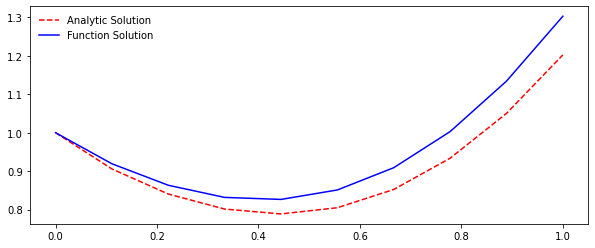

In [4]:
x_space = np.linspace(0, 1, nx)    
y_space = psy_analytic(x_space)

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))

def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

In [6]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lr = 0.001

In [7]:
epochs = 1000

for epoch in range(epochs):
    loss_grad =  grad(loss_function)(W, x_space)
    
    W[0] = W[0] - lr * loss_grad[0]
    W[1] = W[1] - lr * loss_grad[1]

print(loss_function(W, x_space))

0.2845123369910499


In [8]:
res = []

for xi in x_space:
    yi = 1 + xi * neural_network(W, xi)[0][0]
    res.append(yi)

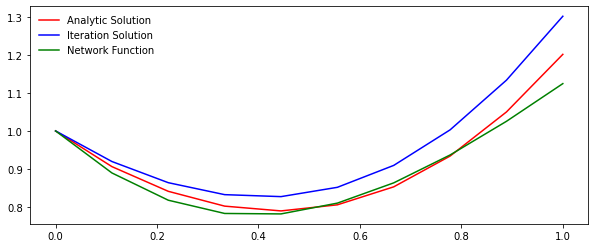

In [9]:
plt.figure(figsize=(10,4))

plt.plot(x_space, y_space, '-r', label='Analytic Solution')
plt.plot(x_space, res, '-g', label='Network Function')
plt.legend(frameon=False)
plt.show()